# Title

**Authors:** your name, Marcin Abram

**Affiliation:** ...

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="9037071e37ec172af7425e2456b141a1322dc872aec8e887ef32fe92c7c3b7f656fc06773f7d8bd72d4a4be432413719d0920ee13aa72ea659888e0c58298d43", 
                                  set_as_default=True, overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

{'100': 481, '101': 474, '000': 25, '001': 44}
{'101': 477, '100': 471, '001': 31, '000': 45}
{'101': 479, '100': 464, '001': 37, '000': 44}
{'100': 468, '101': 495, '000': 32, '001': 29}
{'101': 482, '100': 475, '000': 33, '001': 34}


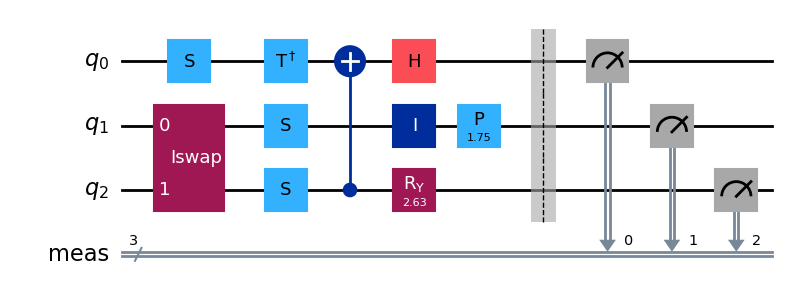

In [24]:
import pdflatex
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit.random import random_circuit
from qiskit.providers.basic_provider import BasicSimulator

# Returning random quantum circuit given num_q and depth of circuit
def get_random_qc(num_q, depth):
    q = QuantumRegister(noq)
    circ = random_circuit(num_q, depth, measure=False)
    return circ

# Returning 'n' output arrays for given circuit
def get_circuit_output(circ, n):
    output = [dict() for x in range(n)]
    circ.measure_all()
    backend = BasicSimulator()
    tqc = transpile(circuit, backend)
    for i in range(0,n):
        counts = backend.run(tqc).result().get_counts()
        print(counts)
        output[i] = counts    

# Main Function -- Calling Random Circuit Generator
noq = 3
depth = 4
runs = 5

circuit = get_random_qc(noq, depth)
get_circuit_output(circuit, runs)
circuit.draw(output='mpl')

In [ ]:
from qiskit_aer import AerSimulator

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

# Construct a simulator using a noise model
# from a real backend.
provider = QiskitRuntimeService()
backend = provider.get_backend("ibm_kyoto")
aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
result_noise = aersim_backend.run(circ).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)